In [20]:
import pandas as pd
import numpy as py

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
hotel = pd.read_csv('http://bit.ly/dwp-data-hotels')

In [5]:
data_hotel = hotel

In [6]:
hotel.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,country,market_segment,reserved_room_type,assigned_room_type,deposit_type,company,adr,arrival_date
0,Resort Hotel,0,7,0,1,1,0.0,GBR,Direct,A,C,No Deposit,NaN,75.0,2015-07-01
1,Resort Hotel,0,13,0,1,1,0.0,GBR,Corporate,A,A,No Deposit,NaN,75.0,2015-07-01
2,Resort Hotel,0,14,0,2,2,0.0,GBR,Online TA,A,A,No Deposit,NaN,98.0,2015-07-01
3,Resort Hotel,0,14,0,2,2,0.0,GBR,Online TA,A,A,No Deposit,NaN,98.0,2015-07-01
4,Resort Hotel,0,0,0,2,2,0.0,PRT,Direct,C,C,No Deposit,NaN,107.0,2015-07-01


In [17]:
def group_leadtime(row):
    if row['lead_time'] <= 200:
        return '<200'
    elif row['lead_time'] <= 400:
        return '201-400'
    elif row['lead_time'] <= 600:
        return '401-600'
    return '>600'

data_hotel['group_lead_time'] = data_hotel.apply(group_leadtime, axis=1)


In [9]:
data_hotel.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,country,market_segment,reserved_room_type,assigned_room_type,deposit_type,company,adr,arrival_date,group_lead_time
0,Resort Hotel,0,7,0,1,1,0.0,GBR,Direct,A,C,No Deposit,NaN,75.0,2015-07-01,1
1,Resort Hotel,0,13,0,1,1,0.0,GBR,Corporate,A,A,No Deposit,NaN,75.0,2015-07-01,1
2,Resort Hotel,0,14,0,2,2,0.0,GBR,Online TA,A,A,No Deposit,NaN,98.0,2015-07-01,1
3,Resort Hotel,0,14,0,2,2,0.0,GBR,Online TA,A,A,No Deposit,NaN,98.0,2015-07-01,1
4,Resort Hotel,0,0,0,2,2,0.0,PRT,Direct,C,C,No Deposit,NaN,107.0,2015-07-01,1


In [18]:
result = data_hotel.groupby(['is_canceled','group_lead_time'], as_index=False)['hotel'].count() \
                    .rename(columns={'hotel' : 'jumlah'})\
                             .sort_values('group_lead_time',ascending=False)

In [19]:
result

,is_canceled,group_lead_time,jumlah
3,0,>600,1
7,1,>600,145
2,0,<200,66078
6,1,<200,31975
1,0,401-600,604
5,1,401-600,1363
0,0,201-400,7803
4,1,201-400,10706


<AxesSubplot:>

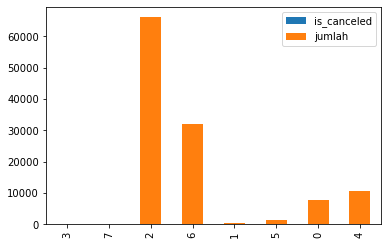

In [21]:
result.plot.bar(stacked=True)

In [30]:
chicago = pd.read_csv('Chicago.csv')

In [31]:
chicago

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,9080545,3/31/2016 23:30,3/31/2016 23:46,2295,926,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990.0
1,9080521,3/31/2016 22:59,3/31/2016 23:02,3439,198,259,California Ave & Francis Pl,276,California Ave & North Ave,Subscriber,Male,1974.0
2,9080479,3/31/2016 22:24,3/31/2016 22:26,4337,124,344,Ravenswood Ave & Lawrence Ave,242,Damen Ave & Leland Ave,Subscriber,Female,1992.0
3,9080475,3/31/2016 22:22,3/31/2016 22:41,3760,1181,318,Southport Ave & Irving Park Rd,458,Broadway & Thorndale Ave,Subscriber,Female,1979.0
4,9080443,3/31/2016 22:08,3/31/2016 22:19,1270,656,345,Lake Park Ave & 56th St,426,Ellis Ave & 60th St,Subscriber,Female,1997.0
...,...,...,...,...,...,...,...,...,...,...,...,...
72126,12150369,10/01/2016 01:40,10/01/2016 01:43,1651,233,117,Wilton Ave & Belmont Ave,114,Sheffield Ave & Waveland Ave,Subscriber,Male,1971.0
72127,12150340,10/01/2016 01:21,10/01/2016 01:29,4803,472,123,California Ave & Milwaukee Ave,503,Drake Ave & Fullerton Ave,Subscriber,Female,1991.0
72128,12150249,10/01/2016 00:35,10/01/2016 00:53,3906,1069,90,Millennium Park,197,Michigan Ave & Madison St,Customer,NaN,NaN
72129,12150216,10/01/2016 00:19,10/01/2016 00:44,5882,1492,300,Broadway & Barry Ave,300,Broadway & Barry Ave,Subscriber,Male,1993.0
